Lee, Jong Yol   BFA-Cinema 1  
Group1 CS 5101  Natural Language Processing  

# NLP algorithm comparison through food similarity comparison

By performing cosine similarity analysis and clustering analysis using simple TF-IDF and NMF(Non-Negative Matric Factorization) among natural language processing algorithms, valid similarity analysis results can be obtained even with a simple algorithm.




### Collecting Wiki Documents of Filipino and Korean Cuisine

In [1]:
import wikipediaapi

wiki_corpus = wikipediaapi.Wikipedia(
    user_agent='Corpus(Cuisine)', 
    language='en',
    extract_format=wikipediaapi.ExtractFormat.WIKI
    )

In [2]:
# https://en.wikipedia.org/wiki/Filipino_cuisine
pages = [#'Filipino_cuisine', 
        'Bulalo', 'Pancit', 'Pinakbet', 'Puto_(food)', 'Tinola',
         #'Korean_cuisine',
        'Galbi-tang', 'Naengmyeon', 'kimchi', 'Tteokbokki', 'Samgye-tang']
cuisine_docs = []
total_len = 0
for p in pages:
    p_wiki = wiki_corpus.page(p)
    if p_wiki.exists():
        print(f"{p} - Exists. len:{len(p_wiki.text)}")
        cuisine_docs.append(p_wiki.text)
        total_len += len(p_wiki.text)

print(total_len)

Bulalo - Exists. len:879
Pancit - Exists. len:11414
Pinakbet - Exists. len:4656
Puto_(food) - Exists. len:7617
Tinola - Exists. len:1534
Galbi-tang - Exists. len:1999
Naengmyeon - Exists. len:4932
kimchi - Exists. len:32299
Tteokbokki - Exists. len:9155
Samgye-tang - Exists. len:3402
77887


In [3]:
cuisine_docs

['Bulalô (Tagalog: [bʊˈlɐlɔʔ]) is a beef dish from the Philippines. It is a light colored soup that is made by cooking beef shanks and bone marrow until the collagen and fat has been melted into the clear broth. It typically includes leafy vegetables (like pechay or cabbage), corn on the cob, scallions, onions, garlic, ginger, and fish sauce. Potatoes, carrots, or taro can also be added. It is commonly eaten on rice with soy sauce and calamansi on the side. Bulalo is native to the Southern Luzon region of the Philippines, particularly in the provinces of Batangas and Cavite.\nSimilar dishes in other parts of the Philippines include the Western Visayan cansi which is soured with batuan fruit; the Waray dish pakdol; and the Cebuano dish pochero.\n\nSee also\nLauya\nNilaga\nCansi\nPhilippine cuisine\n\nExternal links\n Media related to Bulalo at Wikimedia Commons\n\n\n== References ==',
 'Pancit (Tagalog pronunciation: [panˈsɪt] pan-SIT), also spelled pansít, is a general term referring t

### Vectorization Using gensim

In [4]:
from gensim import corpora
import spacy
nlp = spacy.load('en_core_web_lg')

In [5]:
cuisine_texts = []
for document in cuisine_docs:
    text = []
    doc = nlp(document)
    for w in doc:
        if not w.is_stop and not w.is_punct and not w.like_num:
            text.append(w.lemma_)
    cuisine_texts.append(text)
#texts is a mini-corpus specifically for toxic algal bloom

print(len(cuisine_texts), [len(t) for t in cuisine_texts])
for text in cuisine_texts:
    print(text[:2], ", ..., ", text[-2:])

10 [97, 1225, 472, 766, 165, 203, 510, 3128, 1003, 354]
['Bulalô', 'Tagalog'] , ...,  ['=', '=']
['Pancit', 'Tagalog'] , ...,  ['report', 'Pancit']
['Pinakbet', 'call'] , ...,  ['original', 'pinakbet']
['Puto', 'Filipino'] , ...,  ['=', '=']
['Tinola', 'filipino'] , ...,  ['=', '=']
['Galbi', 'tang'] , ...,  ['Konglish', 'Kitchen']
['Naengmyeon', '냉면'] , ...,  ['City', 'Tourism']
['Kimchi', 'Korean'] , ...,  ['KJFC/2023.38.4.203', 'ISSN']
['Tteokbokki', 'Korean'] , ...,  ['website', 'baedduck']
['Samgye', 'tang'] , ...,  ['Korean', 'idomin.com']


### creating a BOW representation of the mini-corpus

In [6]:
import itertools
cuisine_dictionary = corpora.Dictionary(cuisine_texts)
print(len(cuisine_dictionary.token2id), 
      dict(itertools.islice(cuisine_dictionary.token2id.items(), 10))
)

2527 {'\n': 0, '\n\n': 1, '\n\n\n': 2, '\n ': 3, '=': 4, 'Batangas': 5, 'Bulalo': 6, 'Bulalô': 7, 'Cansi': 8, 'Cavite': 9}


### Using the doc2bow method, which, as the name suggests, helps convert our document to bag-of-words.

In [7]:
cuisine_corpus = [cuisine_dictionary.doc2bow(text) for text in cuisine_texts]
[c[:5] for c in cuisine_corpus]

[[(0, 5), (1, 2), (2, 1), (3, 1), (4, 4)],
 [(0, 53), (1, 9), (5, 2), (9, 4), (13, 2)],
 [(0, 20), (1, 8), (16, 1), (18, 1), (22, 7)],
 [(0, 26), (1, 6), (2, 1), (4, 4), (5, 1)],
 [(0, 10), (1, 4), (2, 1), (3, 1), (4, 4)],
 [(0, 11), (1, 4), (24, 5), (25, 2), (32, 1)],
 [(0, 19), (1, 7), (22, 7), (24, 4), (26, 12)],
 [(0, 101), (1, 43), (17, 1), (22, 7), (28, 24)],
 [(0, 38), (1, 11), (22, 7), (24, 1), (28, 1)],
 [(0, 14), (1, 4), (26, 2), (40, 10), (41, 2)]]

In [8]:
corpora.MmCorpus.serialize('cuisine_corpus.mm', cuisine_corpus)

### Converting Bag-of-Words to TF-IDF representation

In [9]:
from gensim import models
tfidf = models.TfidfModel(cuisine_corpus)

for document_tfidf in tfidf[cuisine_corpus]:
       print(len(document_tfidf), document_tfidf[:5])


76 [(2, 0.08184134375014518), (3, 0.10940326971071415), (4, 0.3273653750005807), (5, 0.08184134375014518), (6, 0.31304138670339926)]
542 [(5, 0.015507018211663953), (9, 0.0414587155606574), (13, 0.0207293577803287), (15, 0.0207293577803287), (16, 0.023603418640849652)]
270 [(16, 0.019170520681388664), (18, 0.019170520681388664), (22, 0.032680071309316286), (25, 0.025189369205940868), (26, 0.03206229042050645)]
359 [(2, 0.011573466500680552), (4, 0.04629386600272221), (5, 0.011573466500680552), (10, 0.015471093447920367), (16, 0.017616112344276402)]
112 [(2, 0.05754150903267711), (3, 0.07691991533621784), (4, 0.23016603613070843), (14, 0.07691991533621784), (22, 0.010664706567619642)]
126 [(24, 0.09252192382918818), (25, 0.08722654065238349), (32, 0.058301026813897795), (37, 0.012920358909010712), (39, 0.012920358909010712)]
278 [(22, 0.02022940310052092), (24, 0.026462651243052634), (26, 0.0793879537291579), (36, 0.004619269379539696), (39, 0.013857808138619088)]
1281 [(17, 0.004734696

### How to calculate TF-IDF similarity matrix of a complete corpus with Gensim  
Reference: https://gist.github.com/clemsos/7692685

In [10]:
from gensim import similarities
index = similarities.MatrixSimilarity(tfidf[cuisine_corpus])

In [11]:
sims = index[tfidf[cuisine_corpus]]
sims.shape, sims

((10, 10),
 array([[0.9999998 , 0.03467939, 0.026189  , 0.03617153, 0.13150124,
         0.03280932, 0.00863954, 0.01353108, 0.00709184, 0.00180953],
        [0.03467939, 0.9999989 , 0.04512652, 0.04771957, 0.03783636,
         0.0102828 , 0.08324036, 0.018296  , 0.03259591, 0.01627045],
        [0.026189  , 0.04512652, 0.9999993 , 0.02929128, 0.06412444,
         0.03668907, 0.01728226, 0.04288221, 0.01403196, 0.00667407],
        [0.03617153, 0.04771957, 0.02929128, 1.        , 0.03495439,
         0.00403794, 0.01046357, 0.01371551, 0.01613122, 0.00893704],
        [0.13150124, 0.03783636, 0.06412444, 0.03495439, 0.9999999 ,
         0.00954741, 0.01267136, 0.01404139, 0.00579607, 0.04288141],
        [0.03280932, 0.0102828 , 0.03668907, 0.00403794, 0.00954741,
         1.0000002 , 0.02801573, 0.04393926, 0.04925059, 0.10432199],
        [0.00863954, 0.08324036, 0.01728226, 0.01046357, 0.01267136,
         0.02801573, 0.9999988 , 0.0663815 , 0.02264052, 0.02897182],
        [0.01353

This matrix is symmetric, with elements mirrored across the main diagonal.  
The main diagonal values are Self-Compared Values.

### To create a heatmap of cuisine similarities

In [12]:
# https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl


### To get the lower triangle of a matrix as percentage values
Removing Duplicate Values  
Removing Self-Compared Values  
Tranform to percentage values

In [13]:
sims_heatmap = np.round(np.tril(sims, k=-1)*100, 1)
sims_heatmap

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 3.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 2.6,  4.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 3.6,  4.8,  2.9,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [13.2,  3.8,  6.4,  3.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 3.3,  1. ,  3.7,  0.4,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.9,  8.3,  1.7,  1. ,  1.3,  2.8,  0. ,  0. ,  0. ,  0. ],
       [ 1.4,  1.8,  4.3,  1.4,  1.4,  4.4,  6.6,  0. ,  0. ,  0. ],
       [ 0.7,  3.3,  1.4,  1.6,  0.6,  4.9,  2.3,  1.6,  0. ,  0. ],
       [ 0.2,  1.6,  0.7,  0.9,  4.3, 10.4,  2.9,  2.7,  1.2,  0. ]],
      dtype=float32)

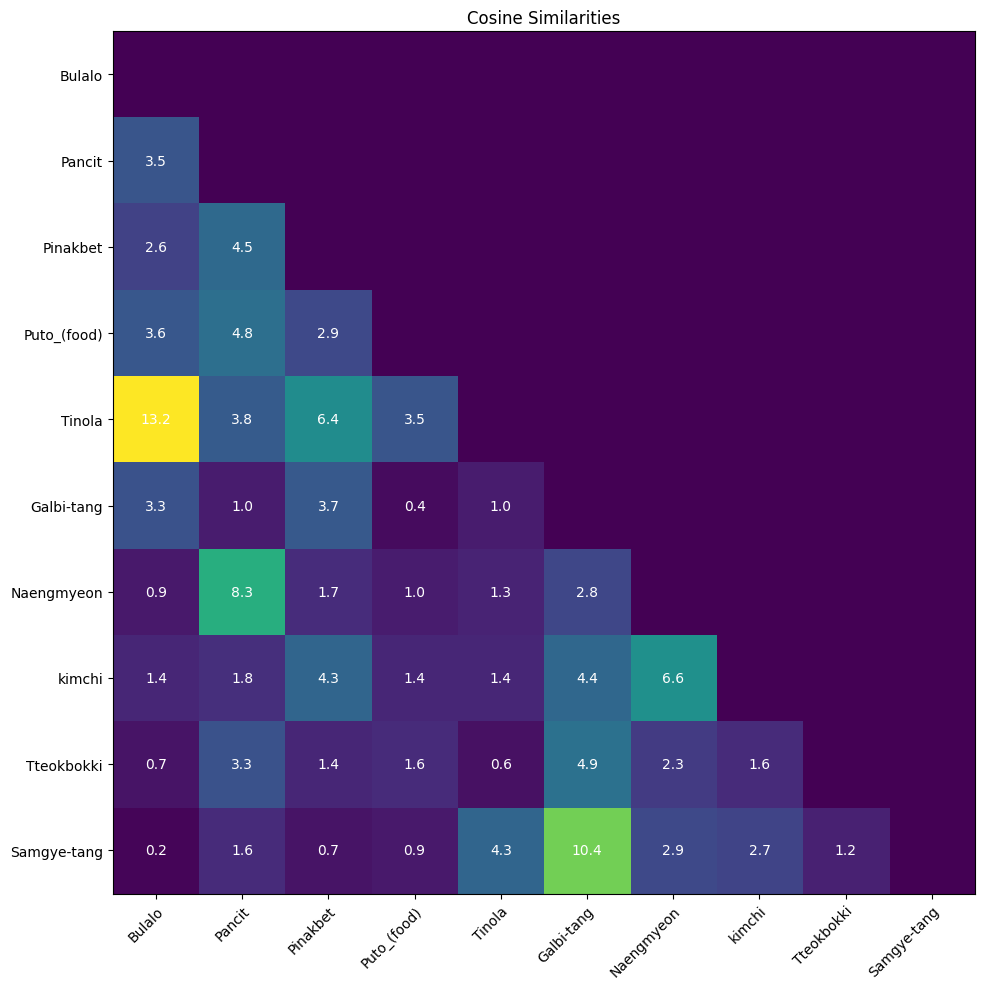

<Figure size 500x300 with 0 Axes>

In [14]:

fig, ax = plt.subplots(figsize=sims_heatmap.shape)
im = ax.imshow(sims_heatmap)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(pages)), labels=pages)
ax.set_yticks(np.arange(len(pages)), labels=pages)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(pages)):
    for j in range(len(pages)):
        if i > j:
            text = ax.text(j, i, sims_heatmap[i, j],
                        ha="center", va="center", color="w")

ax.set_title("Cosine Similarities")
fig.tight_layout()
plt.figure(figsize=(5,3))
plt.show()


## NMF

In [15]:
import pandas as pd
df_cuisine = pd.DataFrame(cuisine_docs, columns=['Cuisine'])
df_cuisine.head()

,Cuisine
0,Bulalô (Tagalog: [bʊˈlɐlɔʔ]) is a beef dish fr...
1,Pancit (Tagalog pronunciation: [panˈsɪt] pan-S...
2,Pinakbet (also called pakbet) is an indigenous...
3,"Puto is a Filipino steamed rice cake, traditio..."
4,Tinola is a Filipino soup usually served as a ...


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_cuisine = tfidf.fit_transform(df_cuisine['Cuisine'])



In [17]:
tfidf_cuisine, tfidf_cuisine.shape

(<10x568 sparse matrix of type '<class 'numpy.float64'>'
 	with 1697 stored elements in Compressed Sparse Row format>,
 (10, 568))

In [18]:

tfidf.get_feature_names_out()[:20], tfidf.get_feature_names_out()[-20:], len(tfidf.get_feature_names_out()), 

(array(['12', '1392', '15', '1897', '18th', '1960s', '19th', '2020', '24',
        '918', 'according', 'activities', 'add', 'added', 'adding',
        'addition', 'additional', 'adds', 'adopted', 'alternative'],
       dtype=object),
 array(['visayas', 'war', 'water', 'western', 'wheat', 'white', 'wide',
        'widely', 'wine', 'winter', 'woman', 'wood', 'word', 'world',
        'wrapped', 'wrote', 'year', 'yellow', 'yeolmu', 'young'],
       dtype=object),
 568)

In [19]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=4,random_state=42)

nmf_model.fit(tfidf_cuisine)

NMF(n_components=4, random_state=42)

In [20]:
len(nmf_model.components_)

4

In [21]:
nmf_model.components_

array([[0.        , 0.        , 0.00052392, ..., 0.05263619, 0.09157284,
        0.01300698],
       [0.        , 0.        , 0.        , ..., 0.00528964, 0.        ,
        0.00054348],
       [0.02011361, 0.05657181, 0.        , ..., 0.        , 0.        ,
        0.03453028],
       [0.01181863, 0.        , 0.01376319, ..., 0.01302647, 0.        ,
        0.02194837]])

In [22]:
print("The top 15 most common words")
for index,topic in enumerate(nmf_model.components_):
    print(f'TOPIC #{index+1}')
    top_word_indices = topic.argsort()[-15:]
    for index in top_word_indices:
        print(f"{tfidf.get_feature_names_out()[index]}", end=", ")
    print('\n')

The top 15 most common words
TOPIC #1
based, chinese, soy, south, gochujang, oil, cold, served, korea, sauce, noodle, broth, korean, kimchi, noodles, 

TOPIC #2
pechay, leafy, sauce, like, added, vegetable, leaves, chicken, lauya, philippines, beans, fish, ilocano, dish, vegetables, 

TOPIC #3
time, samgyetang, days, dish, beef, radish, pot, galbi, short, korean, ginseng, soup, chicken, ribs, tang, 

TOPIC #4
leaf, flour, glutinous, traditionally, sugar, cakes, cake, cooked, called, meat, banana, coconut, steamed, rice, puto, 



In [23]:
topic_results = nmf_model.transform(tfidf_cuisine)

In [24]:
topic_results.argmax(axis=1)
df_cuisine['CuisineGroup'] = topic_results.argmax(axis=1)
df_cuisine.sort_values(by=['CuisineGroup'])

,Cuisine,CuisineGroup
1,Pancit (Tagalog pronunciation: [panˈsɪt] pan-S...,0
6,"Naengmyeon (냉면; 冷麵, in South Korea) or raengmy...",0
7,"Kimchi (; Korean: 김치, romanized: gimchi, IPA: ...",0
8,"Tteokbokki (Korean: 떡볶이), or simmered rice cak...",0
0,Bulalô (Tagalog: [bʊˈlɐlɔʔ]) is a beef dish fr...,1
2,Pinakbet (also called pakbet) is an indigenous...,1
4,Tinola is a Filipino soup usually served as a ...,1
5,Galbi-tang (Korean: 갈비탕) or short rib soup is ...,2
9,"Samgye-tang (삼계탕; 蔘鷄湯), or ginseng chicken sou...",2
3,"Puto is a Filipino steamed rice cake, traditio...",3
